# Regression Continued: Variable Transformation, Multiple Regression

---

**Motivating queston:** What do we do if we have non-normal data or colinearity in our model?

In [113]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf
import statsmodels.iolib.summary
from statsmodels.stats.descriptivestats import Describe


# read in the mammal dataset
wd = '../datasets/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", r'LAPACK')

# Part I:

Let's look at an example with more complex relationships between variables

In [2]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


### Check 1. Distribution

First, Lets check out a scatter plot of body weight and brain weight

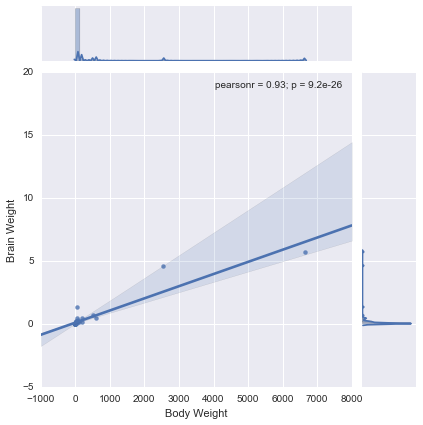

In [133]:
# Review from last class: 
# https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.regplot.html#seaborn.regplot

# New plotting tool: jointplot
g = sns.jointplot('bodywt', 'brainwt', mammals, kind='reg')
g.set_axis_labels( "Body Weight", "Brain Weight");

### Log transformation can help here. 

It's hard to see what's going on here because our samples are skewed.

*More on the math http://onlinestatbook.com/2/transformations/log.html*

In [168]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

In [187]:
# Create a jointplot of the log transformed data

#### This looks much better!

## Part 1 Review -  Student: 
Update and complete the code below to use regplot and display correlations between body weight and two dependent variables: `sleep_rem` and `awake`.


##### Complete below for 2 new models: 
With body weight as the x and y set as:
1. sleep_rem 
2. awake

#### Create the jointplots

In [118]:
# New plotting tool: jointplot

#### What if we have many columns? How might we explore variable relationships?

In [131]:
# Select numeric columns:
mammals_numeric_features = mammals.select_dtypes(include=[np.number]).dropna()

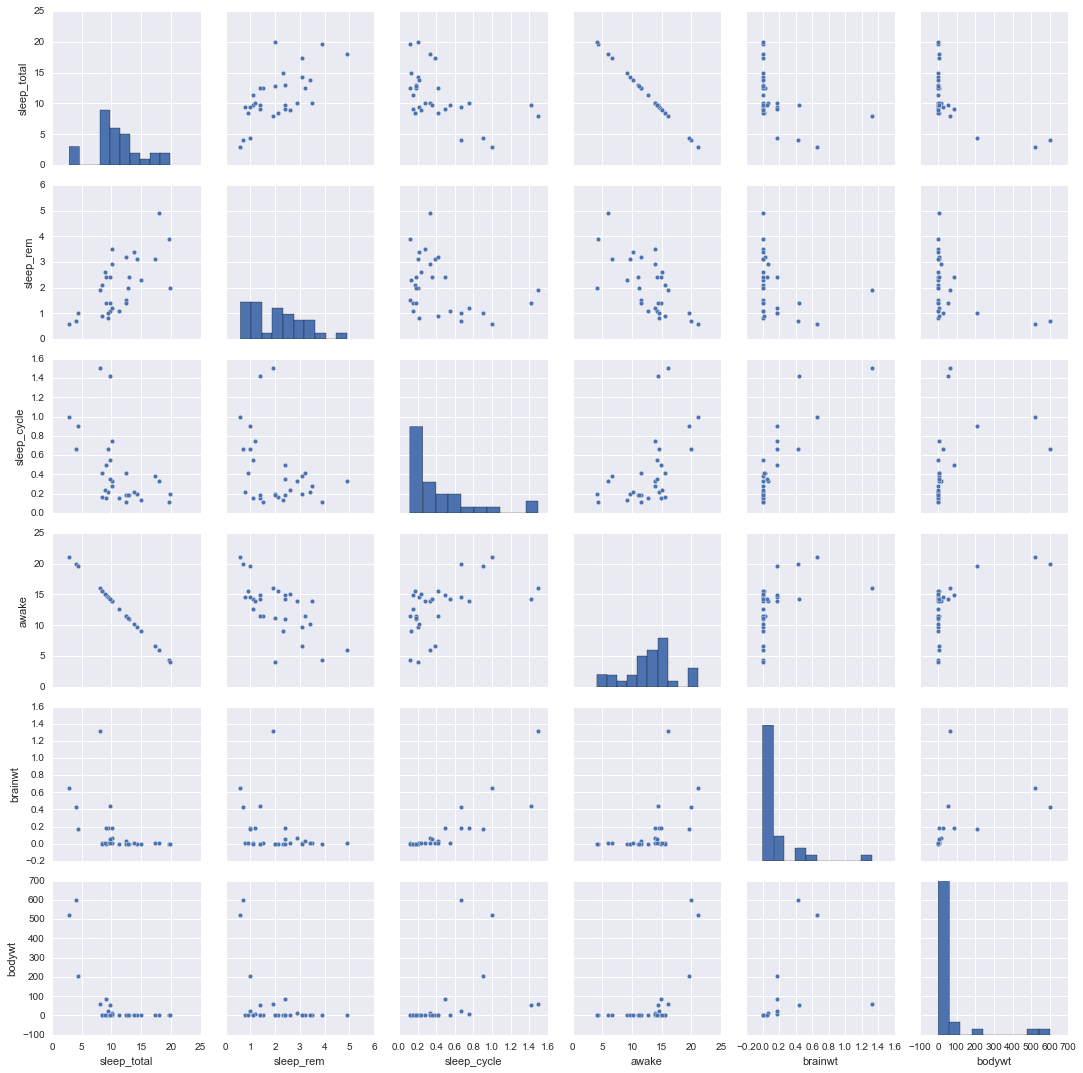

In [134]:
# Pairplot!: https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot
g = sns.pairplot(mammals_numeric_features)

# Tip: Pairplot is *extremely* powerful, but can be slow for large datasets. Consider using df.sample(n) in such cases.

In [144]:
# TODO: Create a scatter plot of log-scaled features

In [145]:
# How to choose? -> We want a skewness near zero!

pd.DataFrame({
        'original': mammals_numeric_features.skew(),
        'log-transformed': mammals_numeric_features.apply(np.log10).skew()
    })

,log-transformed,original
sleep_total,-1.135105,0.332505
sleep_rem,-0.233754,0.675459
sleep_cycle,0.536082,1.722478
awake,-1.386166,-0.332505
brainwt,0.240355,3.300562
bodywt,0.315734,3.269532


##### We decided above that we will need a log transformation. Let's take a look at both models to compare

In [164]:
# original dataset (not transformed)

X = mammals[['bodywt']]
y = mammals['brainwt']

# 1. create a fitted model in one line
# formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
# with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=mammals).fit()

# 2. print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Sun, 19 Jun 2016   Prob (F-statistic):           9.16e-26
Time:                        15:40:09   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080        -0.011     0.183
X              0.0010   5.03e-05     19.176      0.000         0.001     0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* With this current model, brainwt is roughly bodywt * 0.0010
* The model explains, roughly, 87% of the variance of the dataset 

In [166]:
# Whats the predicted brain size for a body weight of 500kg?

lm.predict({"X": 500})

array([ 0.56789192])

### Student: repeat with the log transformation

In [151]:
# 1. create a fitted model in one line
#  formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#  with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'

# 2. print the full summary

### What does our output tell us?

Our output tells us that:


### Bonus: predict the brain weight for a body weight of 500 using the log-transformed model

In [186]:
# Answer

---

# Part II: Multiple Regression Analysis using citi bike data 

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by **`square feet`**, but a lot of other variables play a vital role: **`bedrooms`**, **`bathrooms`**, **`location`**, **`appliances`**, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called *multicollinearity*.

In [210]:
bike_data = pd.read_csv('../datasets/bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Check 2. Multicollinearity
What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

## Students: 
using the code from the demo create a correlation heat map comparing 'temp', 'atemp', 'casual'

In [213]:
# TODO

bike_data[['temp', 'atemp', 'casual']].corr()

,temp,atemp,casual
temp,1.000000,0.987672,0.459616
atemp,0.987672,1.000000,0.454080
casual,0.459616,0.454080,1.000000


#### Question: What did we find? 

#### The correlation matrix explains that:


*We can measure this effect in the coefficients*

## Intro to scikit learn

In [16]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y - algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    
    # Show the histogram
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))

    # keep the model
    return algo

temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

atemp


/Users/Aerlinger/.pyenv/versions/2.7.11/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/Aerlinger/.pyenv/versions/2.7.11/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/Aerlinger/.pyenv/versions/2.7.11/lib/python2.7/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



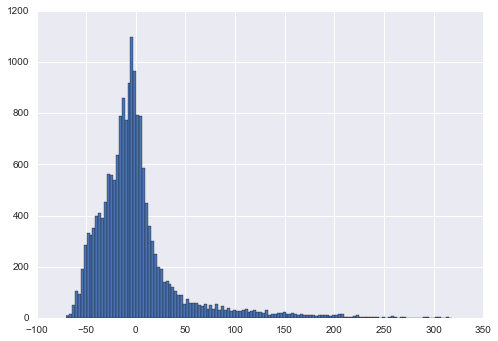

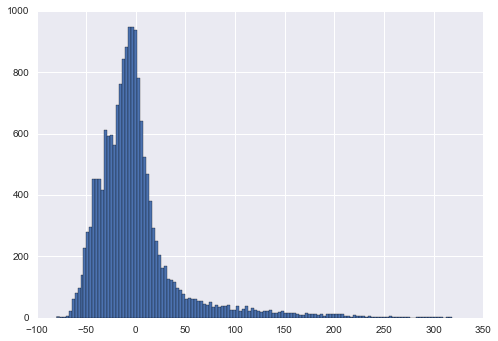

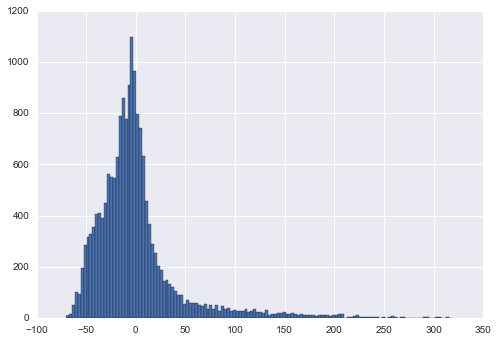

In [17]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation: 


### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?



P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

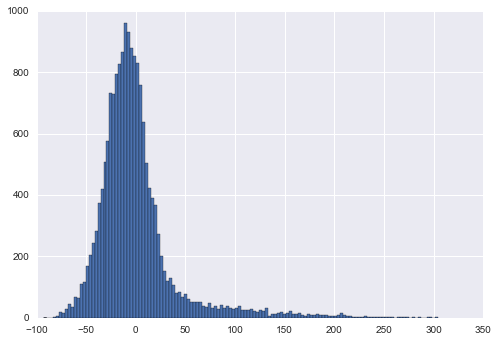

In [18]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]

get_linear_model_metrics(x, y, linear_model.LinearRegression())

## Guided Practice: Multicollinearity with dummy variables (15 mins)



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  4.05930101e+12   4.05930101e+12   4.05930101e+12   4.05930101e+12]
y-intercept: -4.05930100616e+12
R-Squared: 0.0233497737473

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666652
R-Squared: 0.0233906873841


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

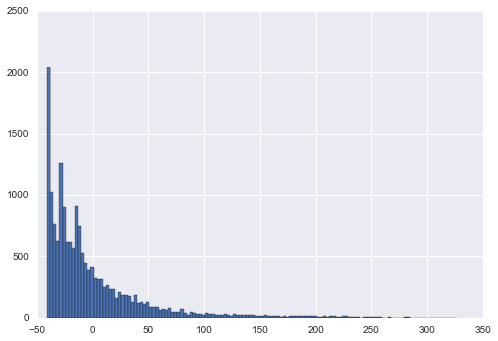

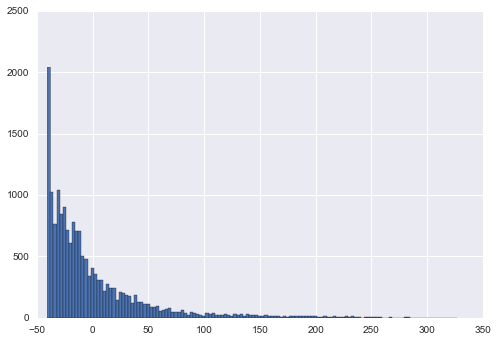

In [19]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print

# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)

### Similar in Statsmodels

In [20]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     104.0
Date:                Thu, 16 Jun 2016   Prob (F-statistic):           1.04e-87
Time:                        08:26:08   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                 6.782e+11   1.08e+13      0.063      0.950     -2.06e+13  2.19e+13
weather[[1, 2, 3, 4]][0] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
weather[[1, 2, 3, 4]][1] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
weather[[1, 2, 3, 4]][2] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
weather[[1, 2, 3, 4]][3] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
==============================================================================
Omnibus:                     9002.161   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58970.408
Skew:                           2.469   Prob(JB):                         0.00
Kurtosis:                      10.554   Cond. No.                     8.15e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.04e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Students: Now drop one

In [21]:
# dropping one

### Interpretation: 
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




### Checkout our data again

In [22]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [23]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Part 3- Building a model to predict guest ridership
With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:
- Id categorical variables
- Create dummies (weather situation is done for you in the starter code)
- Find at least two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weather_1',
       u'weather_2', u'weather_3', u'weather_4'],
      dtype='object')
               temp  weather_1  weather_2  weather_3
temp       1.000000   0.101044  -0.069657  -0.062406
weather_1  0.101044   1.000000  -0.822961  -0.412414
weather_2 -0.069657  -0.822961   1.000000  -0.177417
weather_3 -0.062406  -0.412414  -0.177417   1.000000
Axes(0.125,0.125;0.62x0.775)


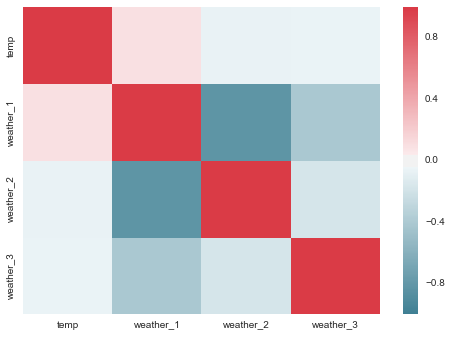

In [24]:
# starter code (hints!)

#Dummies example: 
weather = pd.get_dummies(bike_data.weathersit)

#create new names for our new dummy variables
weather.columns = ['weather_' + str(i) for i in weather.columns]

#join those new variables back into the larger dataset
bikemodel_data = bike_data.join(weather)
print bikemodel_data.columns

#Select columns to keep. Don't forget to set a reference category for your dummies (aka drop one)
columns_to_keep = ['temp', 'weather_1', 'weather_2', 'weather_3'] #[which_variables?]

#checking for colinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?

print correlations
print sns.heatmap(correlations, cmap=cmap)

## Independent Practice: Building model to predict guest ridership 


#### Pay attention to:
* Which variables would make sense to dummy (because they are categorical, not continuous)? 
* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and guest riders  
* having a feature space (our matrix) with low multicollinearity  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?
* What features might explain ridership but aren't included in the data set? 

### You're done when:  
If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos! Move on to the bonus!

In [25]:
# your code here...

In [26]:
# and here

In [27]:
# add as many cells as you need :) 

#### 1: What's the strongest predictor? 

Answer:

#### 2: How well did your model do? 

Answer:

#### 3: How can you improve it? 

Answer:

### Bonus:
    
We've completed a model that explains casual guest riders. Now it's your turn to build another model, using a different y (outcome) variable: registered riders.

**Bonus 1:** What's the strongest predictor? 

**Bonus 2:** How well did your model do? 

**Bonus 3:** How can you improve it? 